# Logistic Regression

### 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

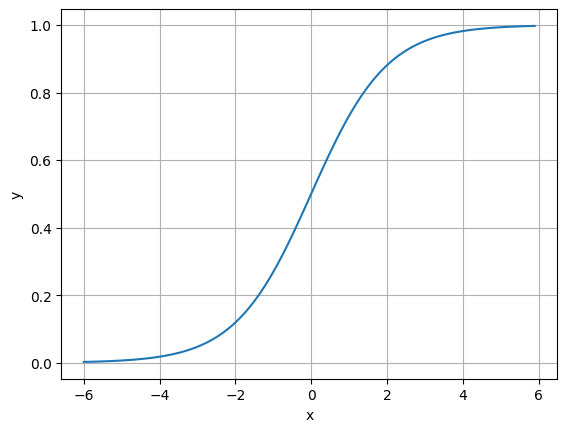

In [2]:
x = np.arange (-6, 6, 0.1)  # -6부터 6까지 0.1 step
y = 1 / (1+np.exp(-x))      # Logistic 함수를 나타내는 수식

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### Scikit-learn을 이용한 Logistic Regression 분류기 구축

In [5]:
passengers = pd.read_csv('train.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
passengers.shape

(891, 12)

In [7]:
passengers.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 데이터 전처리

1. 분석에 사용할 feature 고르기
   생존 여부에 중요한 영향을 미쳤을 것으로 예상되는 feature를 고르자 → Sex, Age,
   Pclass로 예상
   여성, 어린이, 1/2/3등 석 순으로 살아남을 확률이 높다는 가설을 세워본 것
2. 문자열을 숫자로 변환
3. 결측치 처리
4. feature 분리

In [8]:
# 문자열을 숫자로 변환
passengers['Sex']=passengers['Sex'].map({'female':1, 'male':0})

# 결측 데이터를 평균값으로 대체
passengers['Age'].fillna(value=passengers['Age'].mean(), inplace=True)

# feature 분리
dummies = pd.get_dummies(passengers['Pclass'], dtype=int) # one-hot encoding 하고
del passengers['Pclass']                       # 기존 Pclass는 제거하고
passengers = pd.concat([passengers, dummies], axis=1, join='inner') # encoding한 것을 열(axis=1)로 연결(inner옵션으로 동일한 index에 대해서만 연결)
passengers.rename(columns={1:'FirstClass',2:'SecondClass',3:'EtcClass'}, inplace=True) # 범주형 데이터이므로 오히려 숫자->범주로 바꿔준다

passengers.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass,EtcClass
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [10]:
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass','EtcClass']] # 독립변수로 사용할 것들만 분리
survival = passengers[['Survived']] # 종속변수(label)

In [11]:
features

,Sex,Age,FirstClass,SecondClass,EtcClass
0,0,22.000000,0,0,1
1,1,38.000000,1,0,0
2,1,26.000000,0,0,1
3,1,35.000000,1,0,0
4,0,35.000000,0,0,1
...,...,...,...,...,...
886,0,27.000000,0,1,0
887,1,19.000000,1,0,0
888,1,29.699118,0,0,1
889,0,26.000000,1,0,0


In [12]:
survival

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [13]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, survival, test_size=0.3, random_state=42)

In [14]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\rlehd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
print('train 데이터에 대한 Accuracy :', model.score(X_train, y_train))
print('test 데이터에 대한 Accuracy :',model.score(X_test, y_test))

train 데이터에 대한 Accuracy : 0.7961476725521669
test 데이터에 대한 Accuracy : 0.8171641791044776


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred=model.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, y_pred))

Accuracy :  0.8171641791044776


<Axes: >

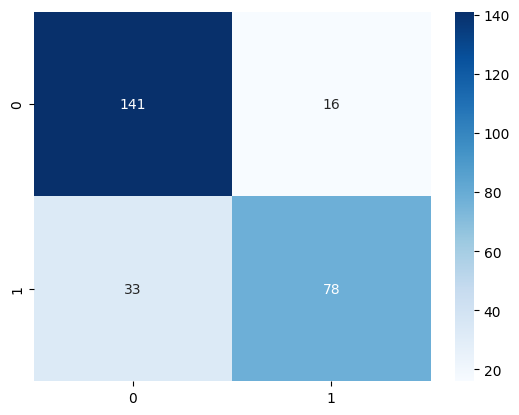

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion=confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues') # annot=True로 값을 출력, fmt는 format

# accuracy는 141 + 78 / all --> 219 / 268 = 0.817...

<Axes: >

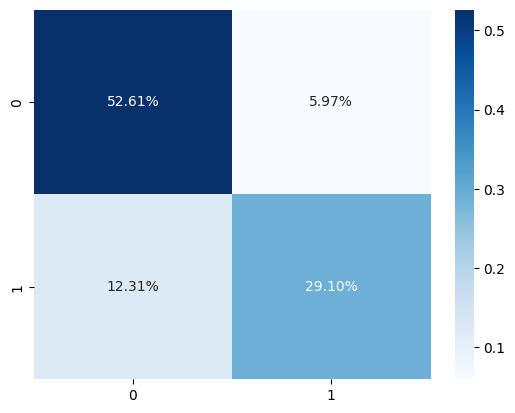

In [21]:
sns.heatmap(confusion /np.sum(confusion), annot=True, fmt='.2%', cmap='Blues') # 비율로 나타냄